# PARTE 3

Download de duas base de dados sobre a vacinação em Alagoas.

As bases são de dias diferentes, sendo `data1` a mais antiga e `data2` a mais recente.

#### Importando bibliotecas que serão utilizadas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Carregando dataset

In [2]:
data1 = pd.read_csv('dados_AL1806.csv', sep=';')
data2 = pd.read_csv('part-00000-8031ffb6-c8db-4d3a-a2e9-40384eaae292.c000 (1).csv', sep=';')

#### Definindo `document_id` como index

É importante definir a chave primaria como index. Caso isso não seja feito, o index será gerado automaticamente e os datasets diferentes terão index diferentes para mesma linha.

In [3]:
data1.set_index('document_id', inplace=True)
data2.set_index('document_id', inplace=True)

### Comparando as duas base de dados

#### Criando um função para identificar novas colunas, colunas deletadas, novas linhas e linhas deletadas

Para isso, vamos usar `pandas.index.difference` e `pandas.columns.difference`

In [4]:
def compare(old, new):
    new_cols = new.columns.difference(old.columns)
    del_cols = old.columns.difference(new.columns)
    new_indx = new.index.difference(old.index)
    del_indx = old.index.difference(new.index)

    return new_cols, del_cols, new_indx, del_indx

In [5]:
new_cols, del_cols, new_indx, del_indx = compare(data1, data2)

#### Plotando os dados

Comparando as duas bases de dados identificamos que não foi inserida nova coluna, não foi deletada nenhuma coluna e nenhuma linha foi deletada. Identificamos também o index de todas as linhas inseridas.

In [27]:
print(f"""\
Novas colunas:

{' '.join(new_cols.astype(str))}

Colunas deletadas:

{' '.join(del_cols.astype(str))}

Novas linhas:

{' | '.join(new_indx.astype(str))}

Linhas deletadas:

{' '.join(del_indx.astype(str))}""")

Novas colunas:



Colunas deletadas:



Novas linhas:

0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0 | 000ada8f-559e-4940-88b6-503a3cc1a5ed-i0b0 | 0011e229-43ab-43ed-9935-4c813880ea21-i0b0 | 0015840c-7bba-4d2f-8fa1-4e57ed7647bf-i0b0 | 001aecb9-3d83-4de0-8d5e-adbb1549bd01-i0b0 | 002372ba-02fa-4e29-9a44-302dc479d9d1-i0b0 | 002538cd-2a28-4b6d-8f92-2e4129facdd0-i0b0 | 00253c83-92ab-4081-b86b-2e861d572647-i0b0 | 0031930d-013b-4f1e-ba54-f9b94a5e4c30-i0b0 | 00323a65-6884-4052-8443-8b9bb3acb29c-i0b0 | 00366f63-5c29-4124-a8bc-5306d2e898a4-i0b0 | 0038c8f4-1f2e-4b9f-a205-b80e35aece53-i0b0 | 0038dffb-feb8-402f-ba78-257de5a446ab-i0b0 | 003d6c47-0b9d-4582-a643-e53cb7d59a7b-i0b0 | 003d9dfc-64d7-484b-abf7-150808f39391-i0b0 | 00436a7e-57bb-4bc8-ac8c-bc0f88179a69-i0b0 | 0048484f-fd79-4e5b-a55c-199729917ba0-i0b0 | 00487ba9-61ff-47a9-bd12-a9a257262a19-i0b0 | 004997fb-7abc-4690-8727-67af82bccb73-i0b0 | 004d4eec-f624-42bd-bbcc-8bbfaaf9b36a-i0b0 | 004d6851-ff54-458b-8589-cf6cdae5f345-i0b0 | 004e5636-ef0b-448d-bc

Montando um gráfico para visualizar o número de novas colunas, colunas deletadas, novas linhas e linhas deletadas.

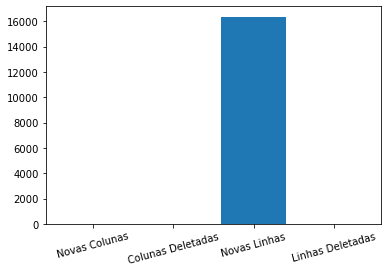

In [52]:
plt.bar(['Novas Colunas','Colunas Deletadas','Novas Linhas', 'Linhas Deletadas'],[new_cols.size, del_cols.size, new_indx.size, del_indx.size])
plt.xticks(rotation=15)
plt.show()

#### Criando função para avaliar mudança

A função `comparechange` avalia qualquer mudança nos dados e retorna o index da linha, a coluna, o valor anterior e o valor atual.

In [7]:
def comparechange(old, new):
    old, new = old.align(new)

    I, J = np.where(old.ne(new))
    c = old.columns
    r = old.index

    data = []
    for i, j in zip(I, J):
        n = new.iat[i, j]
        o = old.iat[i, j]
        if pd.notna(n) or pd.notna(o):
            data.append([r[i], c[j], o, n])

    return pd.DataFrame(data, columns=['Row', 'Column', 'Old', 'New'])

In [8]:
changes = comparechange(data1, data2)

In [28]:
changes

,Row,Column,Old,New
0,0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0,paciente_id,NaN,759c37edc87373fedf9f349bb2ef9e4c0b6fd58dc0eaf3...
1,0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0,paciente_idade,NaN,69
2,0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0,paciente_datanascimento,NaN,1951-12-24
3,0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0,paciente_enumsexobiologico,NaN,F
4,0008c538-23cb-47b2-b82d-d5e7c727117c-i0b0,paciente_racacor_codigo,NaN,99
...,...,...,...,...
517994,fffa7d12-a0ca-485b-8ed3-efc46bf10083-i0b0,vacina_descricao_dose,NaN,1ª Dose
517995,fffa7d12-a0ca-485b-8ed3-efc46bf10083-i0b0,vacina_codigo,NaN,87
517996,fffa7d12-a0ca-485b-8ed3-efc46bf10083-i0b0,vacina_nome,NaN,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
517997,fffa7d12-a0ca-485b-8ed3-efc46bf10083-i0b0,sistema_origem,NaN,Novo PNI


Um pequeno problema é que quando uma linha é adicionada, essa linha é reconhecida pela função `comparechange`. Podemos retirar essas linhas e montar um dataframe apenas com mudanças de valores nas linhas já existentes.

In [23]:
onlychanges = changes.loc[pd.notnull(changes.Old)]

In [24]:
onlychanges

,Row,Column,Old,New


No caso, não houve nenhuma mudança nos dados além da inserção de novas linhas.

### Exploração da evolução das bases


#### Qual a evolução temporal no número de pessoas que tomaram a 1ª e 2ª dose?

Para analisar a evolução temporal da quantidade de vacinas aplicadas para 1ª e 2ª dose, foi feito um agrupamento dos dados com base na `vacina_descricao_dose` e uma contagem do número de `paciente_id`.

In [124]:
grouped1 = data1.groupby([data1['vacina_descricao_dose']])
grouped2 = data2.groupby([data2['vacina_descricao_dose']])
grouped1 = grouped1['paciente_id'].count()
grouped2 = grouped2['paciente_id'].count()

In [136]:
diferenca_1dose = np.array(grouped2)[0] - np.array(grouped1)[0]
diferenca_2dose = np.array(grouped2)[1] - np.array(grouped1)[1]

print("\nBASE DE DADOS ANTIGA\n",grouped1,"\n\n")
print("BASE DE DADOS RECENTE\n",grouped2,"\n\n")
print("Evolução:\n +", diferenca_1dose , "1º Dose\n +", diferenca_2dose , "2º Dose.")


BASE DE DADOS ANTIGA
 vacina_descricao_dose
    1ª Dose    848752
    2ª Dose    307273
Name: paciente_id, dtype: int64 


BASE DE DADOS RECENTE
 vacina_descricao_dose
    1ª Dose    859628
    2ª Dose    312753
Name: paciente_id, dtype: int64 


Evolução:
 + 10876 1º Dose
 + 5480 2º Dose.


Percebe-se que foram aplicadas 66% mais 1ª Dose durante o intervalo de tempo entre a publicação de uma base de dados e outra.

#### Qual o tipo de vacina foi mais aplicada no intervalo de tempo entre os dados?

O mesmo método foi utilizado aqui. Para analisar a evolução temporal da quantidade de cada tipo de vacina aplicada, foi feito um agrupamento dos dados com base na `vacina_nome` e uma contagem do número de `paciente_id`.

In [131]:
grouped1_vacina_nome = data1.groupby([data1['vacina_nome']])
grouped2_vacina_nome = data2.groupby([data2['vacina_nome']])
grouped1_vacina_nome = grouped1_vacina_nome['paciente_id'].count()
grouped2_vacina_nome = grouped2_vacina_nome['paciente_id'].count()

In [137]:
diferenca_AstraZeneca = np.array(grouped2_vacina_nome)[0] - np.array(grouped1_vacina_nome)[0]
diferenca_Butantan = np.array(grouped2_vacina_nome)[1] - np.array(grouped1_vacina_nome)[1]
diferenca_Covishield = np.array(grouped2_vacina_nome)[2] - np.array(grouped1_vacina_nome)[2]
diferenca_Pfizer = np.array(grouped2_vacina_nome)[3] - np.array(grouped1_vacina_nome)[3]

print("\nBASE DE DADOS ANTIGA\n",grouped1_vacina_nome,"\n\n")
print("BASE DE DADOS RECENTE\n",grouped2_vacina_nome,"\n\n")
print("Evolução:\n +", diferenca_AstraZeneca , "AstraZeneca\n +", diferenca_Butantan , "Butantan\n +", diferenca_Covishield , "Covishield\n +", diferenca_Pfizer, "Pfizer")


BASE DE DADOS ANTIGA
 vacina_nome
Covid-19-AstraZeneca                                          86947
Covid-19-Coronavac-Sinovac/Butantan                          545910
Vacina Covid-19 - Covishield                                 451913
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     71255
Name: paciente_id, dtype: int64 


BASE DE DADOS RECENTE
 vacina_nome
Covid-19-AstraZeneca                                          87677
Covid-19-Coronavac-Sinovac/Butantan                          546395
Vacina Covid-19 - Covishield                                 464080
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer     74229
Name: paciente_id, dtype: int64 


Evolução:
 + 730 AstraZeneca
 + 485 Butantan
 + 12167 Covishield
 + 2974 Pfizer


Percebe-se que a quantidade de vacinas aplicadas do tipo Covishield foi bem maior que os outros tipos. Isso faz sentido visto que o Estado de Alagoas recebeu novo lote desse imunizante, com 98.250 doses.